In [19]:
%pylab inline
from scipy.stats import norm
from rpy2.robjects.packages import importr
from rpy2 import robjects
pdf = norm.pdf

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pi', 'choose', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
utils = importr('utils')
mclust = importr('mclust')

In [3]:
def choose(n, k):
    if n < k:
        return 0
    
    else:
        num = math.factorial(n)
        den = math.factorial(k)*math.factorial(n - k)
    return int(num/den)

In [4]:
def gen_pi(K = 4, v = 20, acorn = 1234):
    np.random.seed(acorn)
    #Taken from Bijan
    
    while True:
        pi_0 = np.random.uniform(size=K) # Generate K Uniform(0,1) random variables
        pisum = np.sum(pi_0) # Calculate the sum of the K generated Uniform(0,1) random variables
        pi = [i/pisum for i in pi_0] # Normalize so that sum(pi) = 1
        Nv = [int(round(i*v)) for i in pi] # Round so that each block has an integer-valued amount of vertices
        if not 0 in Nv and np.sum(Nv)==v: # Make sure no block has 0 vertices and the sum of all vertices is correct
            break
    return pi, Nv # returns the vertex assignment distribution and the number of vertices in each block

In [5]:
def gen_Lambda(K, acorn=1234, ones_ = False):
    if ones_ == True:
        return np.ones(shape = (K, K))
    
    np.random.seed(acorn)
    Lambda = zeros(shape = (K, K)) # K x K matrix to store adjacency probabilities
    for i in range(K): # for each block
        for j in range(i, K): # for each combination (with replacement)
            Lambda[i, j] = np.random.uniform() # generate a Uniform(0,1) random variable
            Lambda[j, i] = Lambda[i, j] # Lambda is symmetric
                   
    return Lambda # returns a K x K, symmetric matrix where Lambda[i,j] in (0, 1)

In [6]:
def adj_matrix(n, pi, Lambda, acorn = 1234):
    np.random.seed(acorn)
    n = int(n) # Just in case!
    A = np.zeros(shape = (n, n)) # n x n adjcacency matrix
    K = len(pi) # extract the number of blocks in the SBM
    
    i = 0 # start at block indexed with 0
    while i < K: # while the block number is less than the total number of blocks
        for k in range(int(round(n*(sum(pi[:i])))), int(round(n*(sum(pi[:i + 1]))))): # for all vertices in block i
            c = i # start at block i
            while c < K: # while the block number is less than the total number of blocks
                for j in range(int(round(n*(sum(pi[:c])))), int(round(n*(sum(pi[:c + 1]))))): # for all vertices in block c
                    A[k, j] = np.random.binomial(1, Lambda[i, c]) # generates and assigns an edge based on block membership
                    A[j, k] = A[k, j] # A is symmetric
                c += 1
            A[k,k] = 0 # A is hollow
        i += 1
        
    return A # returns an n x n, symmetric and hollow matrix where A[i,j] in {0, 1}

In [7]:
def gen_seeds(Nv, seed_ratio, acorn = 1234):
    np.random.seed(acorn)
    
    K = len(Nv)
    
    num_seeds = [int(round(seed_ratio*Nv)) for i in range(K)]
    seeds = [[] for i in m]
    for i in range(K):
        for j in range(num_seeds[i]):
            index = np.random.randint(j)

In [8]:
def gen_nomination_list(likelihoods, unlabeled):
    nom_list = []
        
    return nom_list

In [9]:
K = 3 # number of blocks 
v = 30 # number of vertices
v_list = list(np.arange(v))
labeled_ratio = 0.25 # ratio of labeled vertices
m = int(round(labeled_ratio*v)) # number of labeled vertices
n = int(v - m) # number of unlabeled vertices

pi, Nv = gen_pi(K, v, acorn = 123) # generate vertex distribution, total number of vertices in each block
mv = [int(round(labeled_ratio*Nv[i])) for i in range(K)] # generate the number of labeled vertices in each block
seeds = [[] for i in range(K)] # generate a list to store seed indices

nv = [int(round((1 - labeled_ratio)*Nv[i])) for i in range(K)] # generate the number of unlabeled vertices in each block
L = gen_Lambda(4, acorn = 3, ones_ = False) # generate adjacency probability matrix
print(L)

[[0.5507979  0.70814782 0.29090474 0.51082761]
 [0.70814782 0.89294695 0.89629309 0.12558531]
 [0.29090474 0.89629309 0.20724288 0.0514672 ]
 [0.51082761 0.12558531 0.0514672  0.44080984]]


In [10]:
A = adj_matrix(v, pi, L, acorn = 100) # generate adjacency matrix
print(A)

[[0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
  0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
  1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.
  0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
  1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
  1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 

In [11]:
""" Use when permutation matrix has identity in top left """
#count = 0 # first seed is indexed at 0
#for i in range(K): # for all blocks.. 
#    for k in range(mv[i]): # for the number of seeds in each block..
#        seeds[i].append(count) # append the count to the list of seeds
#        count += 1 # update 
        
""" Use when adjacency matrix is not permuted """
for i in range(K): # for all blocks.. 
    for k in range(mv[i]): # for the number of seeds in each block..
        seeds[i].append(int(i + k + sum(Nv[:i]))) # append the count to the list of seeds

all_seeds = []
for i in range(K):
    for j in range(len(seeds[i])):
        all_seeds.append(seeds[i][j])

unlabeled = [item for item in v_list if item not in all_seeds]
seeds

[[0, 1, 2, 3], [18, 19], [26, 27]]

In [12]:
V, U, _ = linalg.svd(A)
V, U

(array([[-1.54129061e-01,  2.06953525e-01, -2.89993781e-01,
          3.06226001e-01,  2.39508498e-01, -3.84150517e-02,
          1.48541794e-01, -8.37146373e-02,  2.07368273e-01,
          4.78882047e-02, -6.56366404e-02,  1.47190060e-01,
         -3.83214333e-01,  1.51404844e-01, -1.02378790e-01,
         -6.84076177e-02, -2.66422535e-01,  2.78768929e-02,
          6.93211749e-02, -8.20951965e-02, -5.11520587e-03,
          6.92499350e-02, -6.48541637e-02, -9.58047072e-02,
         -1.97592359e-01,  1.41444543e-01,  3.64137761e-01,
         -1.75654500e-01,  2.94096278e-01,  3.03817125e-02],
        [-1.00915849e-01,  4.87234420e-02,  1.77498503e-01,
          1.54596519e-01, -8.68364464e-02,  2.74156217e-01,
          2.24790267e-01,  2.07510045e-01,  2.17222378e-01,
          2.16718401e-01,  1.53486258e-01, -1.38335420e-01,
         -6.07099095e-02, -3.13413218e-01, -1.17005142e-01,
         -2.15294939e-01,  1.92705087e-01,  1.61934916e-01,
         -2.29321169e-01,  1.81964368e-

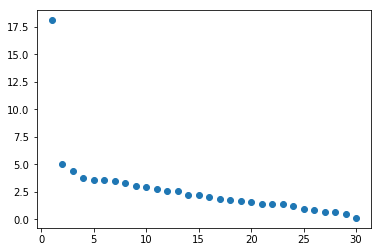

In [13]:
plt.scatter(arange(1, len(U) + 1), U)

In [14]:
def find_dhat(X):
    # returns dhat
    n = len(X)
    d = 1
    #q = n - 1
    sample_var = var(X, ddof = 1)
    sample_scale = sample_var**(1/2)
    d_hat = 1
    likelihood_dhat = 0
    likelihoods =[]
    while d < n:
        mean_sig = mean(X[:d])
        mean_noise = mean(X[d:])
        sig_likelihood = 0
        noise_likelihood = 0
        for i in range(d):
            sig_likelihood += pdf(X[i], mean_sig, sample_scale)
        for i in range(d, n):
            noise_likelihood += pdf(X[i], mean_noise, sample_scale)
            
        likelihood = noise_likelihood + sig_likelihood
        likelihoods.append(likelihood)
        
        if likelihood > likelihood_dhat:
            #print(likelihood, likelihood_dhat, d, d_hat)
            likelihood_dhat = likelihood 
            d_hat = d
        d += 1
    return d_hat, likelihoods

In [15]:
d, l = find_dhat(U)
d_2, l_2 = find_dhat(U[d:])
d_hat = d + d_2

In [21]:
mclustBIC = robjects(mclust)

NameError: name 'mclustBIC' is not defined

In [87]:
block_of_interest_index = 2
likelihoods = np.zeros(len(unlabeled) + 1) # +1 to store denominator 

for p in permutations(unlabeled, n): # find maximally likely permutation
    V = [list(p[int(sum(nv[:i])):int(sum(nv[:i + 1]))]) for i in range(K)]
    e = gen_e(A, V, seeds)
    c = gen_c(Nv, e)
    likeli = gen_likelihood(V, L, e, c)
    likelihoods[-1] += likeli # update denominator
    for i in V[block_of_interest_index]: # update vertices that were in the block of interest
        arg = unlabeled.index(i) # find the vertex's position in the likelihood array 
        likelihoods[arg] += likeli # update the correct vertex's likelihood
print(likelihoods)

[9.24623210e-17 6.80463949e-17 9.28110359e-17 1.56905700e-18
 3.05088931e-17 1.56905700e-18 5.40499040e-17 5.40499040e-17
 1.97533283e-16]


In [88]:
nom_list = gen_nomination_list(likelihoods, unlabeled)
print(nom_list)

[4, 2, 3, 9, 10, 6, 5, 8]
